[*********************100%***********************]  1 of 1 completed


c:\Users\paras\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


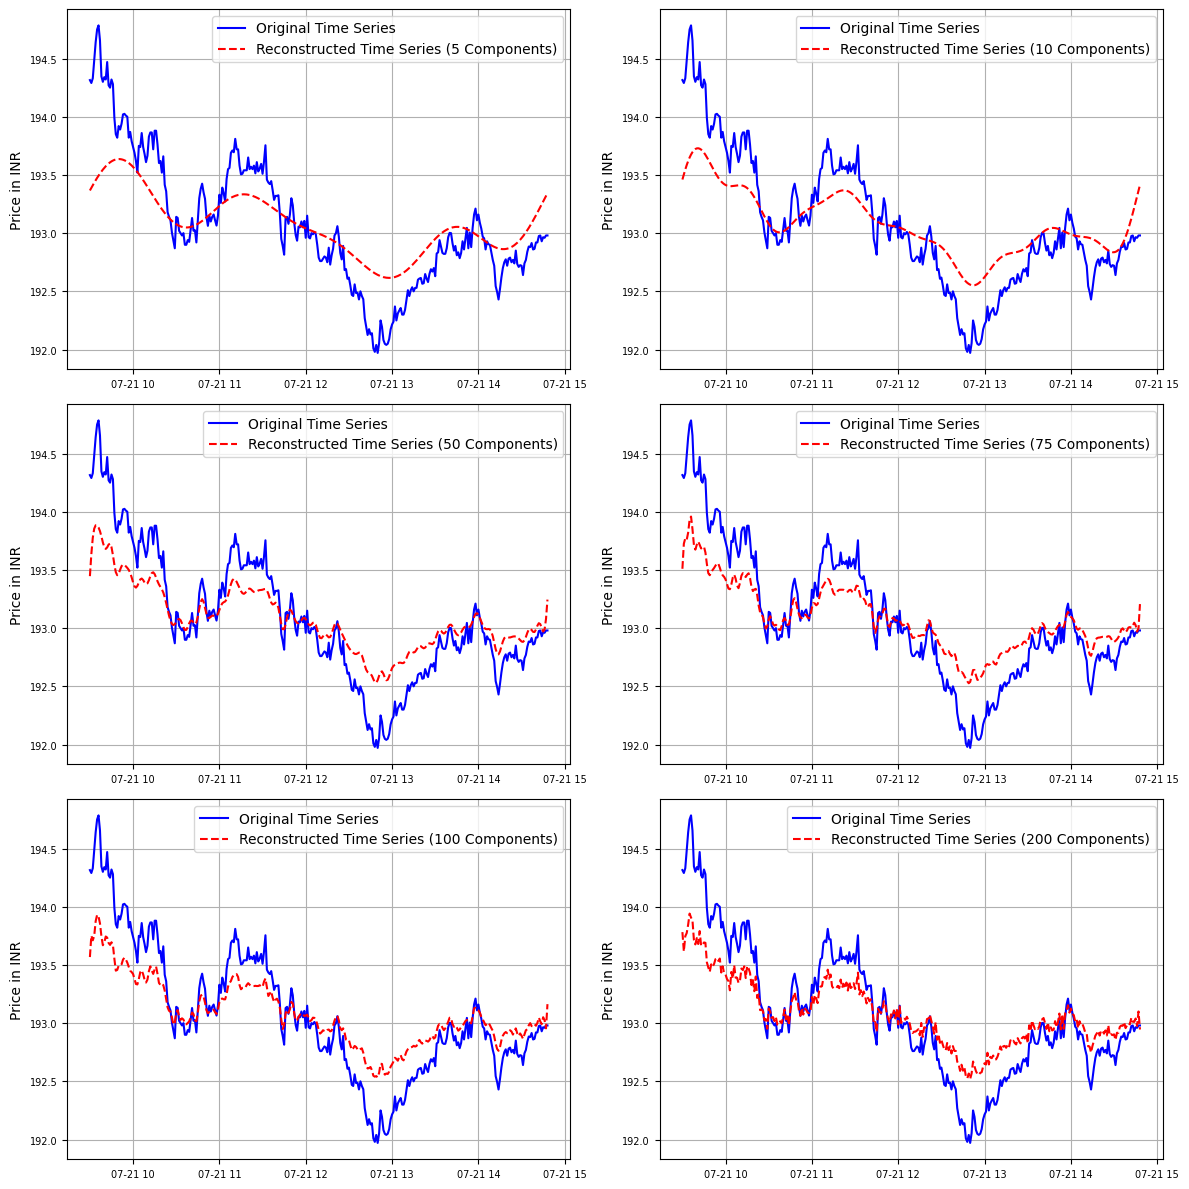

In [5]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def reconstruct_time_series(fft_values, num_components=None):
    # Set all but the first 'num_components' frequency components to zero
    if num_components is not None:
        fft_values_reconstructed = np.copy(fft_values)
        fft_values_reconstructed[num_components:] = 0
    else:
        fft_values_reconstructed = fft_values
    
    # Perform the inverse Fourier transform to reconstruct the time series
    time_series_reconstructed = np.fft.ifft(fft_values_reconstructed)
    return time_series_reconstructed

def plot_reconstructed_time_series_subplot(time_series, time_series_reconstructed, timestamps, num_components=None, subplot_idx=None):
    plt.subplot(3, 2, subplot_idx)
    plt.plot(timestamps, time_series, label='Original Time Series', color='blue')
    plt.plot(timestamps, time_series_reconstructed, label=f'Reconstructed Time Series ({num_components} Components)', color='red', linestyle='--')
    plt.xticks(fontsize=7)
    plt.yticks(fontsize=7)

    plt.ylabel('Price in INR',fontsize=10)
    plt.legend()
    plt.grid(True)

# Example usage
# Replace 'time_series' and 'timestamps' with your actual data
time_series = yf.download('AAPL', period='1d', interval='1m')['Adj Close']
timestamps = time_series.index

# Calculate the discrete Fourier transform of the time series
fft_values = np.fft.fft(time_series)

# Varying number of frequency components for reconstruction
num_components_list = [5, 10, 50, 75, 100,200]

plt.figure(figsize=(12, 12))

for idx, num_components in enumerate(num_components_list):
    # Reconstruct the time series with the specified number of frequency components
    time_series_reconstructed = reconstruct_time_series(fft_values, num_components=num_components)
    
    # Plot the reconstructed time series in a subplot
    plot_reconstructed_time_series_subplot(time_series, time_series_reconstructed, timestamps, num_components=num_components, subplot_idx=idx + 1)

plt.tight_layout()
plt.show()